In [1]:
import torch
import numpy as np
import sympy
from core.hamiltonian import ChainPendulum, EuclideanAndGravityDynamics, Animation2d, GravityHamiltonian
from torchdiffeq import odeint
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
# points = torch.cat([torch.tensor([[0.],[0.]]),ic[0,0].T],dim=1)
# plt.plot(*points)
# plt.quiver(*ic[0,0].T,*ic[0,1].T)
# # plt.ylim(-3,0.5)
# # plt.xlim(-2,2.5)
# plt.axes().set_aspect('equal', 'datalim')

In [3]:
body = ChainPendulum(3,beams=False)
z0 = body.sample_initial_conditions(1)
z0[:,1] = body.M@z0[:,1]*2
bs,_,n,d = z0.shape
z0 = z0.reshape(bs,2*n*d)

In [4]:
z0.shape

torch.Size([1, 12])

In [5]:
ts = torch.linspace(0,50,1000)

In [6]:
dynamics = EuclideanAndGravityDynamics(body)
with torch.no_grad():
    zs = odeint(dynamics, z0, ts, rtol=1e-4, method='rk4').permute(1, 0, 2)

In [7]:
zs.shape

torch.Size([1, 1000, 12])

In [8]:
#GravityHamiltonian(body.M,body.Minv,None,zs[0])

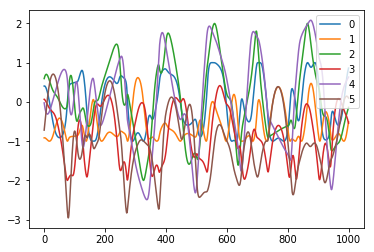

In [16]:
xt = zs[0,:,:n*d].reshape(len(ts),n,d).permute(1,2,0)
pt = zs[0,:,n*d:].reshape(len(ts),n,d).permute(1,2,0)
for i in range(n*d):
    plt.plot(zs[0,:,i])
plt.legend(range(n*d))

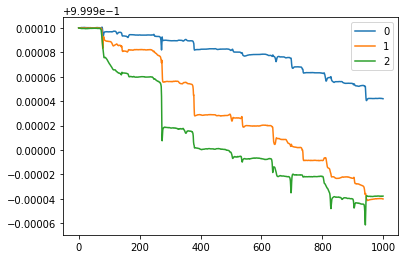

In [20]:
plt.plot((xt[0]**2).sum(0))
for i in range(n-1):
    plt.plot(((xt[1:]-xt[:-1])[i]**2).sum(0))
plt.legend(range(n))
#plt.yscale('log')

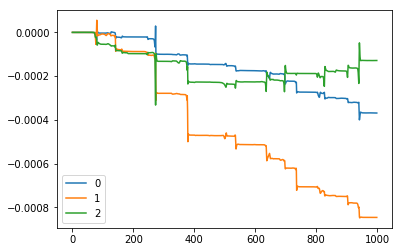

In [23]:
plt.plot((pt[0]*xt[0]).sum(0))
for i in range(n-1):
    plt.plot(((pt[1:]-pt[:-1])[i]*(xt[1:]-xt[:-1])[i]).sum(0))
plt.legend(range(n))
#plt.yscale('log')

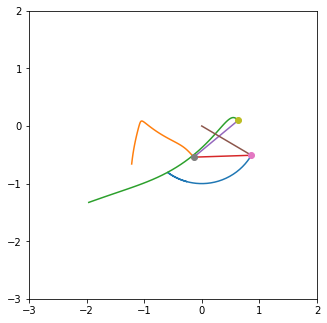

In [10]:
HTML(Animation2d(xt,body).animate().to_html5_video())